In [3]:
import pandas as pd
import json
import os

# Load the JSON dataset
path = "D:\Datasets\Yak_Webshop_1\json_files"
file_path = os.path.join(path, 'sample_diverse_dataset.json')

# Load the dataset from the JSON file
with open(file_path,'r') as file:
    data = json.load(file)

# Convert JSON to DataFrame
df = pd.DataFrame(data['herd'])

# Display the DataFrame to understand its structure and content
print(df.head())  # Preview the first few rows

      name    age          health          behavior
0  Betty-1  100.0  special_health  special_behavior
1  Betty-2    5.9       excellent          positive
2  Betty-3   18.2            fair          stubborn
3  Betty-4   23.3            fair          stubborn
4  Betty-5   26.8            poor          negative


In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, f1_score
import numpy as np

# Assuming 'behavior' is the target variable
X = df.drop(['behavior', 'name'], axis=1)  # Features excluding 'behavior' and 'name'
y = df['behavior']  # Target variable

# Convert categorical variables to numerical using one-hot encoding for 'health'
X_encoded = pd.get_dummies(X, columns=['health'])  # One-hot encode 'health' column

# Apply label encoding for the 'behavior' target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Initialize the model (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform predictions to get original behavior labels
predictions_decoded = label_encoder.inverse_transform(predictions)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

# False Positive Rate Calculation
conf_matrix = confusion_matrix(y_test, predictions)

# F1 Score Calculation
f1 = f1_score(y_test, predictions, average='weighted')
print(f"F1 Score: {f1:.4f}")


Accuracy: 1.0000
F1 Score: 1.0000


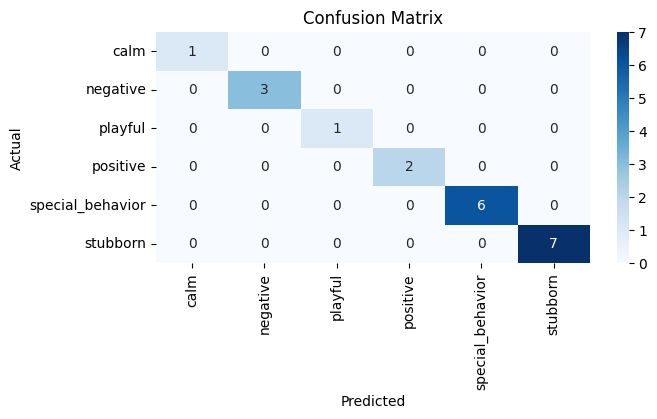

In [16]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(7, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()# Plot confusion matrix

In [29]:
# Assuming the code up to this point has been executed and the model is trained

# Assuming the code up to this point has been executed and the model is trained

# Take 5 random indices from the test set
num_samples = 5
random_indices = np.random.choice(len(X_test), num_samples, replace=False)

# Select 5 random samples from the test set along with their true labels
random_samples = X_test.iloc[random_indices]
true_labels = label_encoder.inverse_transform(y_test[random_indices])

# Make predictions for these 5 random samples
predictions_random_samples = model.predict(random_samples)
predicted_labels = label_encoder.inverse_transform(predictions_random_samples)

# Display the predicted behavior along with respective age and health for the 5 random samples
for i in range(num_samples):
    age = random_samples.iloc[i]['age']
    health = [col.split('_')[-1] for col in random_samples.iloc[i].index if 'health' in col and random_samples.iloc[i][col] == 1][0]
    print(f"Sample {i+1}: Age={age}, Health={health}, True Behavior={true_labels[i]}, Predicted_Behavior={predicted_labels[i]}")



Sample 1: Age=100.0, Health=health, True Behavior=special_behavior, Predicted_Behavior=special_behavior
Sample 2: Age=15.7, Health=fair, True Behavior=stubborn, Predicted_Behavior=stubborn
Sample 3: Age=7.6, Health=excellent, True Behavior=positive, Predicted_Behavior=positive
Sample 4: Age=25.7, Health=poor, True Behavior=negative, Predicted_Behavior=negative
Sample 5: Age=16.5, Health=fair, True Behavior=stubborn, Predicted_Behavior=stubborn


In [ ]:
'''
Conclusion

The provided behavior analysis model attempts to predict yak behavior based on 'Age' and 'Health' attributes.
While it's a step toward understanding yak behavior, fulfilling the statement to predict and comprehend
their behavior over time requires a more comprehensive approach and considerations:

Model's Alignment with Statement:
1. Prediction Aspect:
Prediction: The model predicts behavior based on 'Age' and 'Health',
which is aligned with the prediction aspect of understanding yak behavior.

2. Understanding Aspect:
Comprehension: The model's current state might not fully capture the intricacies of yak 
behavior or their responses to changing conditions.

Limitations and Considerations:
1. Limited Features:
Feature Set: The model relies solely on 'Age' and 'Health', 
which might not cover all aspects influencing yak behavior. 
Additional relevant features, such as environment, diet, social interactions, or seasonal changes,
might provide more comprehensive insights.

2. Temporal Aspects:
Time Aspect: Understanding behavior over time necessitates longitudinal data capturing behavior
changes over different periods. The model doesn’t explicitly handle temporal aspects or changes 
in behavior patterns over time.

3. Behavior Complexity:
Behavior Complexity: Yak behavior is multifaceted and influenced by numerous factors 
beyond 'Age' and 'Health'. Models might need more complex architectures or additional
data to capture such complexity.
'''